# Classifying Fashion-MNIST

Now it's your turn to build a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


Here we can see one of the images.

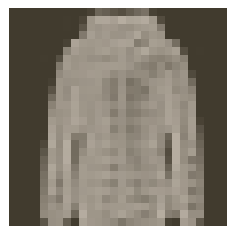

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms

import helper

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [6]:
# TODO: Define your network architecture here
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        #Defining the layers
        self.fc1 = nn.Linear(784, 196)
        self.fc2 = nn.Linear(196, 49)
        #Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(49, 10)
        
    def forward(self, x):
        '''Forward pass through the network, returns the output logits'''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        
        return x

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [10]:
# TODO: Create the network, define the criterion and optimizer
model = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

In [11]:
# TODO: Train the network here
epochs = 4
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        steps += 1
        
        images.resize_(images.size()[0], 784)
        
        images, labels = Variable(images), Variable(labels)
        
        optimizer.zero_grad()
        
        logits = model.forward(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        
        if steps % print_every == 0:
            print("Loss {:4f}".format(running_loss/print_every))
            
            running_loss = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Loss 2.272107
Loss 2.211271
Loss 2.140674
Loss 2.068178
Loss 1.964802
Loss 1.856939
Loss 1.736686
Loss 1.580308
Loss 1.479179
Loss 1.381177
Loss 1.284375
Loss 1.191723
Loss 1.126201
Loss 1.073627
Loss 0.999328
Loss 0.981467
Loss 0.952043
Loss 0.898404
Loss 0.891856
Loss 0.857649
Loss 0.834683
Loss 0.831846
Loss 0.815968
Loss 0.431074
Loss 0.759351
Loss 0.755381
Loss 0.728946
Loss 0.746095
Loss 0.725020
Loss 0.743740
Loss 0.720761
Loss 0.689281
Loss 0.694376
Loss 0.711479
Loss 0.668060
Loss 0.693811
Loss 0.645223
Loss 0.623517
Loss 0.655138
Loss 0.629971
Loss 0.663872
Loss 0.644440
Loss 0.627335
Loss 0.633334
Loss 0.628434
Loss 0.620256
Loss 0.060034
Loss 0.624815
Loss 0.579908
Loss 0.581495
Loss 0.606221
Loss 0.599100
Loss 0.625445
Loss 0.601265
Loss 0.589958
Loss 0.561183
Loss 0.566687
Loss 0.598956
Loss 0.572862
Loss 0.565453
Loss 0.617987
Loss 0.576631
Loss 0.568064
Loss 0.563134
Loss 0.584234
Loss 0.559913
Loss 0.545445
Loss 0.545080
Loss 0.571904
Loss 0.540116
Loss 0.352492
Loss 0

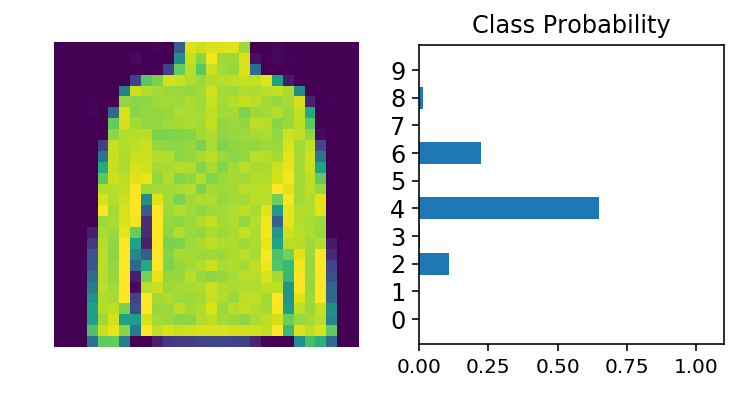

In [13]:
# Test out your network!
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
logits = model.forward(Variable(img.resize_(1, 784)))

# TODO: Calculate the class probabilities (softmax) for img
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps)

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.